# To Do

## A brief explanation of approach including;

   1. Any data pre-processing performed.

   2. Your chosen ML model with justification.

   3. Performance evaluation of the chosen model and obtained results.

   4. Comparison with the performance of other ML models where relevant.

# Loading the dataset

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
dataset_directory = '/content/drive/My Drive/AAKTP'

In [3]:
import os
os.listdir(dataset_directory)

['train_crop.csv',
 'test_crop.xlsx',
 'Task_Harvest Evaluation using Machine Learning.docx',
 'AAKTP.gslides']

# Preprocessing and EDA

## Importing libraries for data cleaning and EDA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

## Examining and understanding content of the data

In [5]:
train_dataframe = pd.read_csv(dataset_directory + '/train_crop.csv')

In [6]:
train_dataframe.shape

(88858, 10)

In [ ]:
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


Dataset contains 10 columns with various data types which can provide a very rich amount of information for data exploration.Also it can be seen already that number of weeks used has some missing values which will require cleaning.

In [ ]:
train_dataframe.describe() # works for ints and floats

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [ ]:
train_dataframe.describe(include=object) #including objects

,ID
count,88858
unique,88858
top,F00000001
freq,1


In [7]:
train_dataframe

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(train_dataframe, *['Estimated_Insects_Count'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(train_dataframe, *['Crop_Type'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(train_dataframe, *['Soil_Type'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(train_dataframe, *['Pesticide_Use_Category'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(train_dataframe, *['Estimated_Insects_Count'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(train_dataframe, *['Crop_Type'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(train_dataframe, *['Soil_Type'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(train_dataframe, *['Pesticide_Use_Category'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(train_dataframe, *[[['Estimated_Insects_Count', 'Crop_Type'], ['Crop_Type', 'Soil_Type'], ['Soil_Type', 'Pesticide_Use_Category'], ['Pesticide_Use_Category', 'Number_Doses_Week']]], **{})
chart

In [ ]:
train_dataframe.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

## Cleaning The Data

Categorical features and target are already ordinalEncoded, NaN values and standardization needs to be done. Find some correlation between number of weeks used and other features/target to determine dropping or imputing. No need for discretization and non-linear transformation. Might have to use polynomial features later.

In [8]:
# manually inspecting to for any obvious correllation
train_dataframe[train_dataframe.Number_Weeks_Used.isnull()]

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
10,F00000021,1212,1,0,1,0,NaN,0,3,0
17,F00000037,2401,0,1,1,0,NaN,0,1,1
35,F00000076,257,0,0,3,30,NaN,0,2,0
...,...,...,...,...,...,...,...,...,...,...
88786,F00155793,1785,1,0,2,60,NaN,16,2,0
88788,F00155801,1898,1,0,2,15,NaN,3,1,0
88825,F00155882,2542,1,0,2,10,NaN,21,2,0
88833,F00155899,2687,1,0,2,10,NaN,21,2,0


<Axes: xlabel='Pesticide_Use_Category', ylabel='count'>

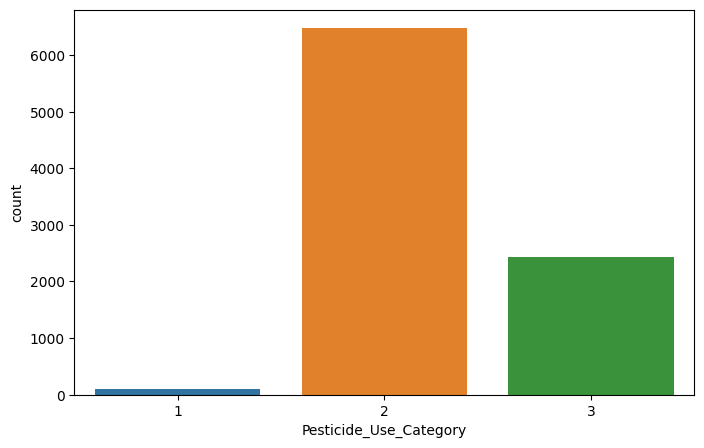

In [9]:
NaN_df = train_dataframe[train_dataframe.Number_Weeks_Used.isnull()]

# countplot of pesticide category when weeks_used is NaN
plt.figure(figsize=(8, 5))
sns.countplot(x=NaN_df['Pesticide_Use_Category'])

In [ ]:
# Make case for no correlation calculation when NaN present
# After manual inpection + count plot shows that whenever pesticide type 1, number of weeks used is O but has value whenever pesticide type 2 or 3.
# And so we fill with mean.

In [10]:
mean = train_dataframe['Number_Weeks_Used'].mean()

# Define a function to apply the conditions and fill NaN values
def fill_nan(row):
    if pd.isna(row['Number_Weeks_Used']):
        if row['Pesticide_Use_Category'] == 1:
            return 0
        elif row['Pesticide_Use_Category'] == 2 or row['Pesticide_Use_Category'] == 3:
            return mean
    return row['Number_Weeks_Used']

# Apply the function to the column
train_dataframe['Number_Weeks_Used'] = train_dataframe.apply(fill_nan, axis=1) # same as train_dataframe['Number_Weeks_Used'].apply(lambda x: fill_nan(x))

In [12]:
train_dataframe.head(50) # inspect after filling of NaN values

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.00000,0,1,0
1,F00000003,209,1,0,1,0,0.00000,0,2,1
2,F00000004,257,1,0,1,0,0.00000,0,2,1
3,F00000005,257,1,1,1,0,0.00000,0,2,1
4,F00000006,342,1,0,1,0,0.00000,0,2,1
5,F00000008,448,0,1,1,0,0.00000,0,2,1
6,F00000009,448,0,1,1,0,0.00000,0,2,1
7,F00000010,577,1,0,1,0,0.00000,0,1,2
8,F00000012,731,0,0,1,0,0.00000,0,2,0
9,F00000020,1132,1,0,1,0,0.00000,0,1,2


In [13]:
#drop ID too : no information content, can lead to overfitting (rand), dimentionality reduction and model efficiency
train_dataframe.drop('ID', axis=1, inplace=True)

In [14]:
train_dataframe.shape

(88858, 9)

## Exploratory Data Analysis

<Axes: xlabel='Crop_Damage', ylabel='count'>

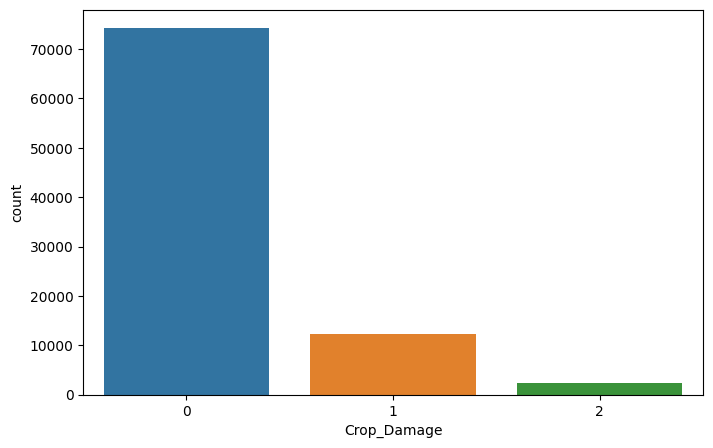

In [15]:
# countplot of crop damage : Looking at class frequencies
plt.figure(figsize=(8, 5))
sns.countplot(x=train_dataframe['Crop_Damage'])

### Looking for correlation

In [16]:
from sklearn.ensemble import RandomForestClassifier

X = train_dataframe.drop('Crop_Damage', axis=1)
y = train_dataframe['Crop_Damage']

# Train a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X, y)

feature_importances = clf.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f'Feature: {feature}, Importance: {importance}')


Feature: Estimated_Insects_Count, Importance: 0.3192027302968453
Feature: Crop_Type, Importance: 0.010942787383891
Feature: Soil_Type, Importance: 0.01464190103708979
Feature: Pesticide_Use_Category, Importance: 0.034209113014514896
Feature: Number_Doses_Week, Importance: 0.15081539492948953
Feature: Number_Weeks_Used, Importance: 0.27756886408198145
Feature: Number_Weeks_Quit, Importance: 0.15066298755296267
Feature: Season, Importance: 0.0419562217032253


# Model selection

## Feature Scaling and Mean Normalization

In [17]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures # might need polynomial features to avoid overfitting

In [18]:
X = train_dataframe.drop('Crop_Damage', axis=1)
y = train_dataframe['Crop_Damage']

In [ ]:
#may run after cross validation if metrics shows underfitting
# quad = PolynomialFeatures(interaction_only=True, include_bias=False)#default degree of 2
# X_poly = quad.fit_transform(X)

This [image](https://scikit-learn.org/stable/_static/ml_map.png) from [sklearn docs](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) about model selection gives a rough guide

## Building a dummy classifier

As shown [ealier](https://colab.research.google.com/drive/1OJHKy-OCOb2X35JXQI0WBBnonMAGGojw#scrollTo=klAOMeKdlYKI&line=3&uniqifier=1), most of the crop are not damaged and so we have a skewed data. This can as well be visualized in percentages.

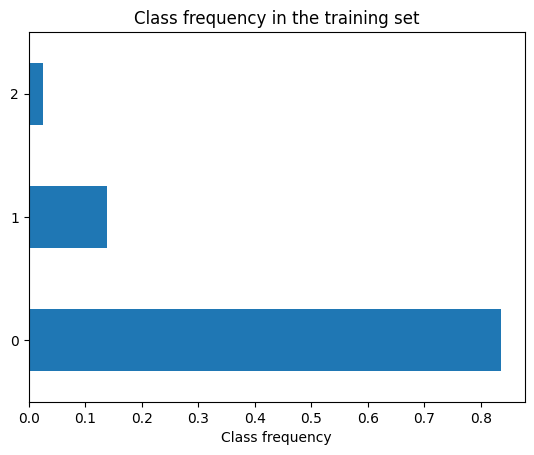

In [19]:
y.value_counts(normalize=True).plot.barh()
plt.xlabel("Class frequency")
_ = plt.title("Class frequency in the training set")

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, test_size=0.2, random_state=42, stratify=y
    )

In [21]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X, y)
print(
    "Accuracy of the dummy classifier: "
    f"{dummy_classifier.score(X_test, y_test):.3f}"
)

Accuracy of the dummy classifier: 0.835


In [22]:
target_predicted = dummy_classifier.predict(X_test)

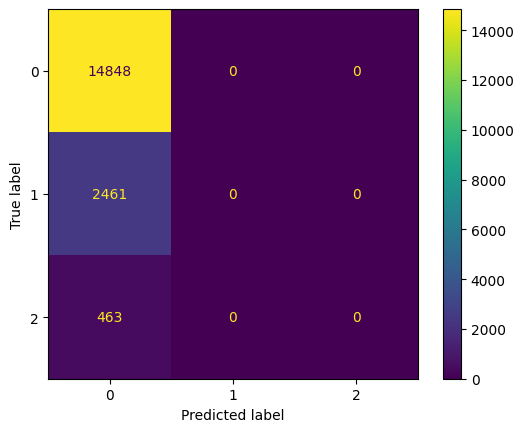

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(dummy_classifier, X_test, y_test)

In [24]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = balanced_accuracy_score(y_test, target_predicted)
print(f"Balanced accuracy: {balanced_accuracy:.3f}")

Balanced accuracy: 0.333


## Buiding models

### Preprocessing experimentation with cross validation and model comparisons

Evaluating Logistic Regression with standard encoding...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating Logistic Regression with onehot encoding...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating LinearSVC with standard encoding...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating LinearSVC with onehot encoding...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating K-NN with standard encoding...
Evaluating K-NN with onehot encoding...
Evaluating Soft Voting Classifier with standard encoding...
Evaluating Soft Voting Classifier with onehot encoding...
Evaluating Hard Voting Classifier with standard encoding...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating Hard Voting Classifier with onehot encoding...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating HistGradientBoosting with standard encoding...
Evaluating HistGradientBoosting with onehot encoding...


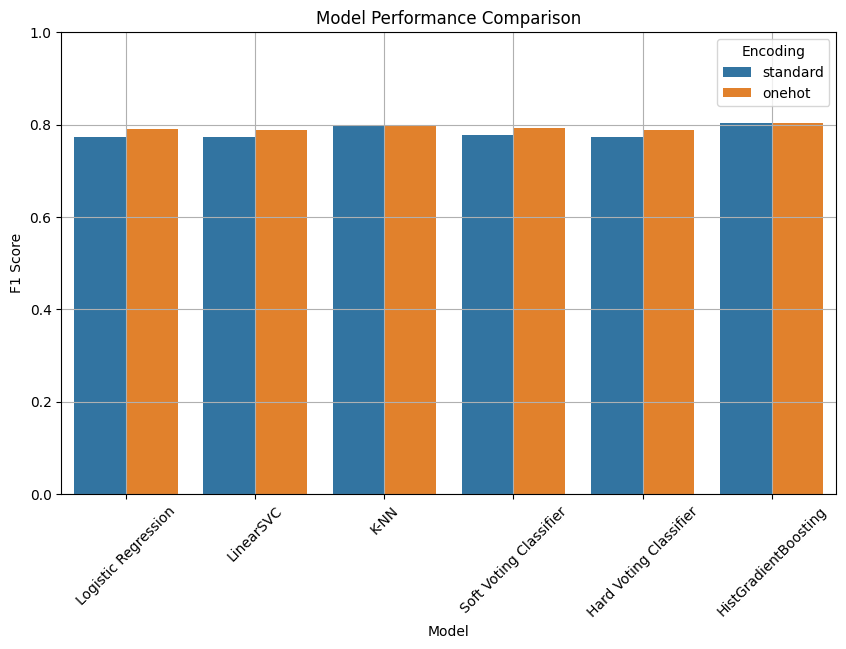

In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import precision_recall_fscore_support
from sklearn.calibration import CalibratedClassifierCV
from sklearn.base import clone

continuous_features = [0, 4, 5, 6]
categorical_features = [1, 2, 3, 7]
# X = train_dataframe.drop('Crop_Damage', axis=1)
# y = train_dataframe['Crop_Damage']


# Calibrate the LinearSVC
calibrated_svc = CalibratedClassifierCV(LinearSVC(random_state=42), cv=3, n_jobs=-1)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, n_jobs=-1),
    'LinearSVC': calibrated_svc,
    'K-NN': KNeighborsClassifier(n_jobs=-1),
    'Soft Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression(random_state=42, n_jobs=-1)),
        ('svc', calibrated_svc),
        ('knn', KNeighborsClassifier(n_jobs=-1))
    ], voting='soft'),
    'Hard Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('svc', calibrated_svc),
        ('knn', KNeighborsClassifier(n_jobs=-1))
    ], voting='hard'),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42)
}


# Define the StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Encoding', 'Precision', 'Recall', 'F1 Score'])

# Loop through each model and preprocessing strategy
for model_name, model in models.items():
    for strategy in ['standard', 'onehot']:
        print(f'Evaluating {model_name} with {strategy} encoding...')

        # Set up the preprocessing
        if strategy == 'standard':
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', StandardScaler(), continuous_features),
                    ('cat', 'passthrough', categorical_features)
                ])
        else:
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', StandardScaler(), continuous_features),
                    ('cat', OneHotEncoder(), categorical_features)
                ])

        # Clone the model to ensure fresh model for each run
        model_clone = clone(model)

        # Create the pipeline
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', model_clone)
                                  ])

        # Cross-validation
        y_pred = cross_val_predict(pipeline, X, y, cv=skf, n_jobs=-1)

        # Calculate metrics
        precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred, average='weighted')

        # Append the results to the results_df DataFrame
        # Using pd.concat() now. Revert to pd.append() if facing issues
        result_data = pd.DataFrame({
            'Model': [model_name],
            'Encoding': [strategy],
            'Precision': [precision],
            'Recall': [recall],
            'F1 Score': [f1_score]
        })

        results_df = pd.concat([results_df, result_data], ignore_index=True)

        # Commented out to avoid pd.append deprecation warning:
        # results_df = results_df.append({
        #     'Model': model_name,
        #     'Encoding': strategy,
        #     'Precision': precision,
        #     'Recall': recall,
        #     'F1 Score': f1_score
        # }, ignore_index=True)

# Save the results to a CSV file
results_df.to_csv('evaluation_results.csv', index=False)

# Plot the results
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='F1 Score', hue='Encoding', data=results_df)
plt.title('Model Performance Comparison')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # Set y-axis range to 0-1 for easier comparison
plt.legend(title='Encoding')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [26]:
evaluation_result_df = pd.read_csv('evaluation_results.csv')

In [27]:
evaluation_result_df

,Model,Encoding,Precision,Recall,F1 Score
0,Logistic Regression,standard,0.758262,0.833285,0.772122
1,Logistic Regression,onehot,0.777737,0.838574,0.789323
2,LinearSVC,standard,0.758281,0.833093,0.772575
3,LinearSVC,onehot,0.778051,0.838945,0.788120
4,K-NN,standard,0.782034,0.827658,0.797451
5,K-NN,onehot,0.782583,0.827905,0.797713
6,Soft Voting Classifier,standard,0.765606,0.835018,0.776365
7,Soft Voting Classifier,onehot,0.781206,0.840183,0.792495
8,Hard Voting Classifier,standard,0.758439,0.833273,0.772269
9,Hard Voting Classifier,onehot,0.778281,0.838968,0.788848


### Hyperparmeter Tuning

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_hist_gradient_boosting  # explicitly require this experimental feature


continuous_features = [0, 4, 5, 6]
categorical_features = [1, 2, 3, 7]
X = train_dataframe.drop('Crop_Damage', axis=1)
y = train_dataframe['Crop_Damage']


# Set up the preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),
        ('cat', 'passthrough', categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', HistGradientBoostingClassifier(random_state=42))
                          ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the parameter grid
param_grid = {
    'classifier__learning_rate': [0.01, 0.1, 1],
    'classifier__max_iter': [100, 200],
    'classifier__max_leaf_nodes': [15, 31, 65],
    'classifier__max_depth': [3, 5, 7]
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print(f'Best parameters: {grid_search.best_params_}')

# # Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# # Calculate and print the metrics
# f1 = f1_score(y_test, y_pred, average='weighted')
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')

# print(f'F1 Score: {f1:.4f}')
# print(f'Precision: {precision:.4f}')
# print(f'Recall: {recall:.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__max_iter': 200, 'classifier__max_leaf_nodes': 15}


TypeError: ignored

### Actual Fitting after experimentation

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

best_model = HistGradientBoostingClassifier(random_state=42)
# best_model = HistGradientBoostingClassifier(max_leaf_nodes=15, max_iter=200, max_depth=5, random_state=42) #default values worked best
# Set up the preprocessing for the best model
best_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),
        ('cat', 'passthrough', categorical_features)
    ])

# Create the pipeline
best_pipeline = Pipeline(steps=[('preprocessor', best_preprocessor),
                           ('classifier', best_model)
                          ])

# Splitting required since actual test set has no lables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Fit the best model to the training data
best_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_pipeline.predict(X_test)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# detailed classification report
print(classification_report(y_test, y_pred))

F1 Score: 0.8054
Precision: 0.7991
Recall: 0.8472
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     14848
           1       0.53      0.18      0.27      2461
           2       0.17      0.00      0.00       463

    accuracy                           0.85     17772
   macro avg       0.52      0.39      0.40     17772
weighted avg       0.80      0.85      0.81     17772



### Learning Curve of best pipeline

Not working as supposed, fix later

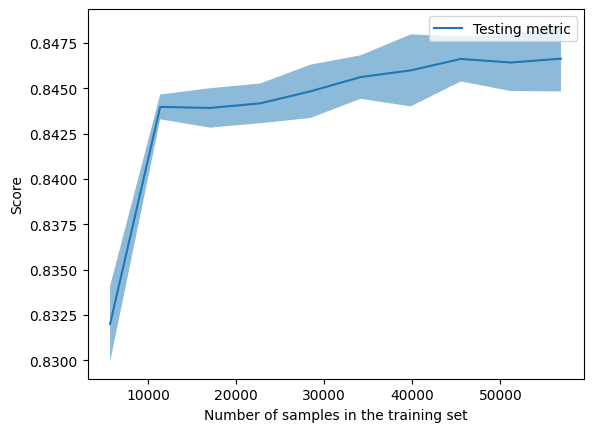

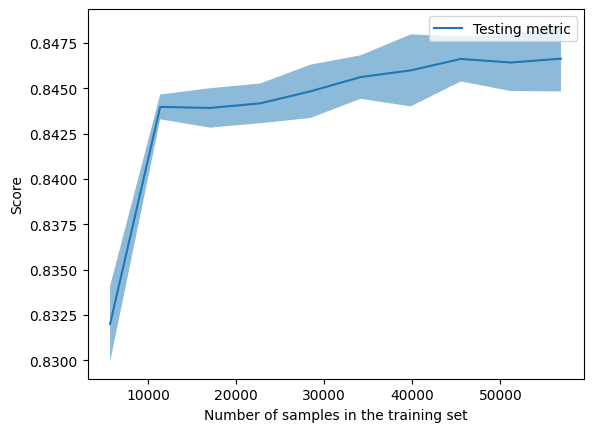

In [39]:
from sklearn.model_selection import LearningCurveDisplay


# Set up the StratifiedKFold object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the LearningCurveDisplay object using the from_estimator method
display = LearningCurveDisplay.from_estimator(
    estimator=best_pipeline,
    X=X_train,
    y=y_train,
    cv=cv,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Plot the learning curve
display.plot()
plt.show()
